<a href="https://colab.research.google.com/github/carloscesar182/ai_advanced_course/blob/main/Notebooks/AnomalyDetection/MediaMovel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [18]:
# gerar um conjunto de dados sintéticos
# gerar distribuição normal de 100 amostras variando entre 0 e 1
# usar a função linspace para criar dados igualmente espaçados
data = np.random.normal(0,1,100) + np.linspace(0,1,100)

# outlier na posição 50 e 25
data[50] = 7
data[25] = 6

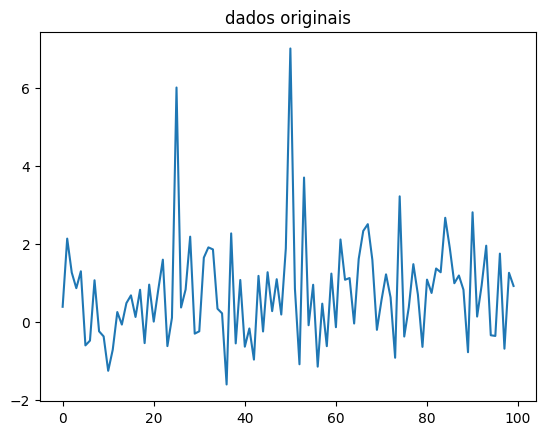

In [23]:
# gerar o grafico
plt.plot(data, label="dados")
plt.title("dados originais")
plt.show()

In [19]:
# converter pra uma serie temporal
s = pd.Series(data)

# calcular media movel
# rolling(10) é a janela deslizante de 10 períodos pra media
s_ma = s.rolling(10).mean()

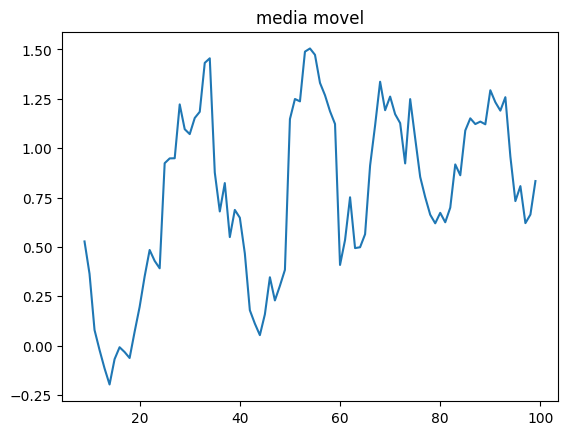

In [22]:
# gerar o grafico
plt.plot(s_ma, label="dados")
plt.title("media movel")
plt.show()

In [20]:
# definição do que é anomalia: por padrão é o valor absoluto da diferença entre valor geral e a media movel é maior que 3x o desvio padrão dos dados
# deve se calibrado para as especificidades do modelo
anomalies = s[np.abs(s - s_ma) > 3 * s.std()]
anomalies

,0
25,6.0
50,7.0


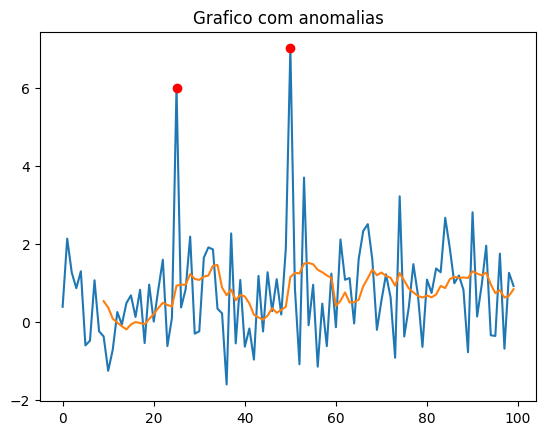

In [21]:
# gerar o grafico
plt.plot(s, label="dados")
plt.plot(s_ma, label="media movel")
plt.plot(anomalies, 'ro', label="anomalias")
plt.title("Grafico com anomalias")
plt.show()